In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("D:/Research Paper Finance/Finance Data/Crypto/cryptocombined.csv")
df.head()

,Date,AdjCloseBTC,VolumeBTC,AdjCloseETH,VolumeETH,AdjCloseLTC,VolumeLTC,AdjCloseRPL,VolumeRPL
0,31-12-2019,7193.599121,2.116795e+10,129.610855,8936866397,41.340073,3015923778,0.192894,1116761075
1,01-01-2020,7200.174316,1.856566e+10,130.802002,7935230330,42.017719,2782992323,0.192667,1041134003
2,02-01-2020,6985.470215,2.080208e+10,127.410179,8032709256,39.823013,2759827139,0.188043,1085351426
3,03-01-2020,7344.884277,2.811148e+10,134.171707,10476845358,42.415573,3260961326,0.193521,1270017043
4,04-01-2020,7410.656738,1.844427e+10,135.069367,7430904515,43.326607,2843192897,0.194355,999331594


In [47]:
df.tail()

,AdjCloseBTC,VolumeBTC,AdjCloseETH,VolumeETH,AdjCloseLTC,VolumeLTC,AdjCloseRPL,VolumeRPL,Year,Month,Weekday Name,Weekday,Is Weekend
Date,,,,,,,,,,,,,
2021-05-03,48927.30469,4.862593e+10,1533.275024,21067146937,180.765610,4560793618,0.458119,4288262516,2021,5,Monday,0,False
2021-06-03,48912.38281,3.436356e+10,1654.741577,22746262366,182.981903,3799599706,0.465106,2758849692,2021,6,Thursday,3,False
2021-07-03,51206.69141,4.313746e+10,1723.153809,23809935410,190.759109,3541357558,0.466867,2364586464,2021,7,Saturday,5,True
2021-08-03,52246.52344,4.859743e+10,1834.727905,27630991158,191.927689,4401225306,0.473597,3587390975,2021,8,Tuesday,1,False
2021-09-03,54207.28516,5.202151e+10,1834.943726,25189595136,199.654495,5070793728,0.479177,3125786368,2021,9,Friday,4,False


In [5]:
df.shape
df.dtypes

Date            object
AdjCloseBTC    float64
VolumeBTC      float64
AdjCloseETH    float64
VolumeETH        int64
AdjCloseLTC    float64
VolumeLTC        int64
AdjCloseRPL    float64
VolumeRPL        int64
dtype: object

In [6]:
df = df.set_index('Date')
df.head(3)

,AdjCloseBTC,VolumeBTC,AdjCloseETH,VolumeETH,AdjCloseLTC,VolumeLTC,AdjCloseRPL,VolumeRPL
Date,,,,,,,,
31-12-2019,7193.599121,2.116795e+10,129.610855,8936866397,41.340073,3015923778,0.192894,1116761075
01-01-2020,7200.174316,1.856566e+10,130.802002,7935230330,42.017719,2782992323,0.192667,1041134003
02-01-2020,6985.470215,2.080208e+10,127.410179,8032709256,39.823013,2759827139,0.188043,1085351426


In [7]:
df.index

Index(['31-12-2019', '01-01-2020', '02-01-2020', '03-01-2020', '04-01-2020',
       '05-01-2020', '06-01-2020', '07-01-2020', '08-01-2020', '09-01-2020',
       ...
       '28-02-2021', '01-03-2021', '02-03-2021', '03-03-2021', '04-03-2021',
       '05-03-2021', '06-03-2021', '07-03-2021', '08-03-2021', '09-03-2021'],
      dtype='object', name='Date', length=431)

In [11]:
# Converting the index as date
df.index = pd.to_datetime(df.index)

In [14]:
# Add Columns denoting the Year,Month,Weekday
import datetime as dt
df['Year'] = df.index.year
df['Month'] = df.index.month
df["Weekday Name"] = df.index.day_name()
df['Weekday'] = df.index.weekday

#Want to know whether the data fall in Sunday or Saturday
df['Is Weekend'] = df['Weekday'].isin((5,6))
df.head()

,AdjCloseBTC,VolumeBTC,AdjCloseETH,VolumeETH,AdjCloseLTC,VolumeLTC,AdjCloseRPL,VolumeRPL,Year,Month,Weekday Name,Weekday,Is Weekend
Date,,,,,,,,,,,,,
2019-12-31,7193.599121,2.116795e+10,129.610855,8936866397,41.340073,3015923778,0.192894,1116761075,2019,12,Tuesday,1,False
2020-01-01,7200.174316,1.856566e+10,130.802002,7935230330,42.017719,2782992323,0.192667,1041134003,2020,1,Wednesday,2,False
2020-02-01,6985.470215,2.080208e+10,127.410179,8032709256,39.823013,2759827139,0.188043,1085351426,2020,2,Saturday,5,True
2020-03-01,7344.884277,2.811148e+10,134.171707,10476845358,42.415573,3260961326,0.193521,1270017043,2020,3,Sunday,6,True
2020-04-01,7410.656738,1.844427e+10,135.069367,7430904515,43.326607,2843192897,0.194355,999331594,2020,4,Wednesday,2,False


In [15]:
# Basic reviewing the data-Picking any random 5 sample from our data
df.sample(5, random_state=0)

,AdjCloseBTC,VolumeBTC,AdjCloseETH,VolumeETH,AdjCloseLTC,VolumeLTC,AdjCloseRPL,VolumeRPL,Year,Month,Weekday Name,Weekday,Is Weekend
Date,,,,,,,,,,,,,
2020-03-06,9656.717773,2.500746e+10,244.179321,9861760817,47.172894,2691495449,0.203663,1335828090,2020,3,Friday,4,False
2021-01-27,30432.546880,6.257676e+10,1253.187134,39394416990,122.949471,6281091792,0.251943,2940937079,2021,1,Wednesday,2,False
2020-02-23,9924.515625,4.118519e+10,273.754150,19585998814,79.536652,5702486428,0.282711,2313819448,2020,2,Sunday,6,True
2020-07-18,9159.040039,1.225260e+10,235.483810,5397402117,42.425865,1141296421,0.199341,870207693,2020,7,Saturday,5,True
2020-10-01,8166.554199,2.871458e+10,143.963776,9084816203,48.727329,3808140302,0.212306,1693646276,2020,10,Thursday,3,False


In [20]:
df["Weekday Name"].value_counts()

Saturday     63
Wednesday    63
Tuesday      61
Sunday       61
Monday       61
Thursday     61
Friday       61
Name: Weekday Name, dtype: int64

In [21]:
df.describe()

,AdjCloseBTC,VolumeBTC,AdjCloseETH,VolumeETH,AdjCloseLTC,VolumeLTC,AdjCloseRPL,VolumeRPL,Year,Month,Weekday
count,431.000000,4.310000e+02,431.000000,4.310000e+02,431.000000,4.310000e+02,431.000000,4.310000e+02,431.000000,431.000000,431.000000
mean,15915.841377,3.815831e+10,489.512855,1.749900e+10,73.889369,4.462054e+09,0.279786,4.067852e+09,2020.155452,6.062645,3.004640
std,12196.823444,2.341183e+10,457.540218,9.946967e+09,45.586157,2.933356e+09,0.117443,4.816386e+09,0.369112,3.582032,1.998831
min,4970.788086,1.225260e+10,110.605873,5.109033e+09,30.930883,9.617167e+08,0.139635,8.283929e+08,2019.000000,1.000000,0.000000
25%,9127.818847,2.411586e+10,210.514946,1.104831e+10,44.736803,2.498579e+09,0.201860,1.530745e+09,2020.000000,3.000000,1.000000
50%,10363.138670,3.417576e+10,341.021149,1.439892e+10,55.587624,3.701856e+09,0.242295,2.163769e+09,2020.000000,6.000000,3.000000
75%,17810.547850,4.551417e+10,518.147430,2.078671e+10,77.251781,5.523708e+09,0.291185,4.099119e+09,2020.000000,9.000000,5.000000
max,57539.945310,3.510000e+11,1960.164795,6.073363e+10,236.973526,1.799426e+10,0.692103,3.497423e+10,2021.000000,12.000000,6.000000


In [18]:
#Indexing
df.loc['2021-02-22']

,AdjCloseBTC,VolumeBTC,AdjCloseETH,VolumeETH,AdjCloseLTC,VolumeLTC,AdjCloseRPL,VolumeRPL,Year,Month,Weekday Name,Weekday,Is Weekend
Date,,,,,,,,,,,,,
2021-02-22,54207.32031,9.205242e+10,1781.99292,42409646036,208.106796,9523044215,0.571741,18769236632,2021,2,Monday,0,False


In [22]:
#Not inclusive end indexing #Not whole data don't know why when large interval
df.loc['2020-03-14':'2020-03-15']

,AdjCloseBTC,VolumeBTC,AdjCloseETH,VolumeETH,AdjCloseLTC,VolumeLTC,AdjCloseRPL,VolumeRPL,Year,Month,Weekday Name,Weekday,Is Weekend
Date,,,,,,,,,,,,,
2020-03-14,5200.366211,3.615451e+10,123.306023,12740784545,34.396587,3270465986,0.147292,2310448365,2020,3,Saturday,5,True
2020-03-15,5392.314941,3.399789e+10,125.214302,12719251813,36.437092,3434485463,0.153902,2197842519,2020,3,Sunday,6,True


In [26]:
# For a month 
#df.loc['2020-01']

### Visualisation

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline 
#display figure inline inJupyter-Notebook

In [25]:
import seaborn as sns
#Use Seaborn style-default & set the default fig. size
sns.set(rc={'figure.figsize':(11,4)})

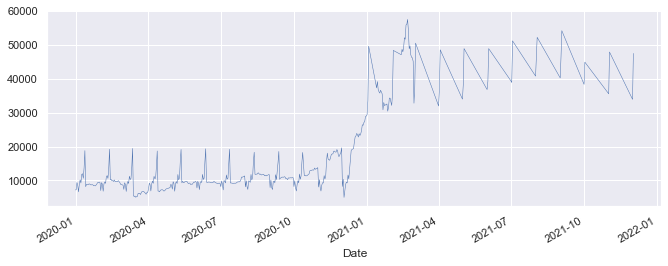

In [27]:
df['AdjCloseBTC'].plot(linewidth=0.5);

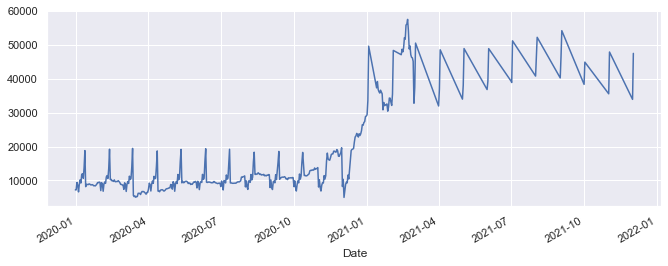

In [28]:
df['AdjCloseBTC'].plot()

TypeError: 'AxesSubplot' object is not iterable

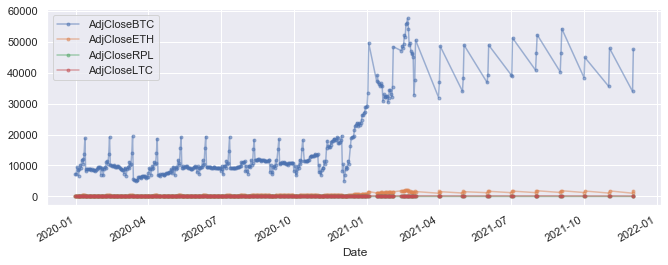

In [37]:
cols_plot = ['AdjCloseBTC','AdjCloseETH','AdjCloseRPL','AdjCloseLTC']
axes = df[cols_plot].plot(marker='.',alpha=0.5)
for ax in axes:
    ax.set_ylabel('Adjusted-Close-Prices')
# plt.subplots(2, 1, figsize=(8,6))

Text(0.5, 1.0, "2020's Prices by Day")

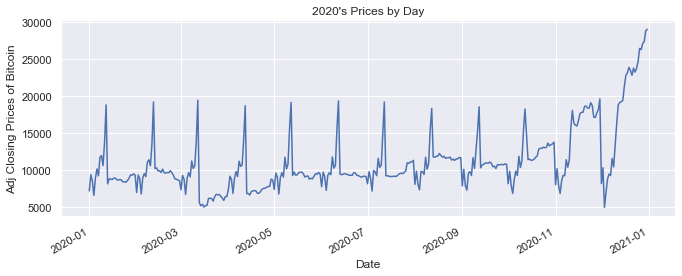

In [39]:
# What Patterns do you see below
ax = df.loc['2020','AdjCloseBTC'].plot()
ax.set_ylabel('Adj Closing Prices of Bitcoin')
ax.set_title("2020's Prices by Day")


Text(0.5, 1.0, "2021's Prices by Day")

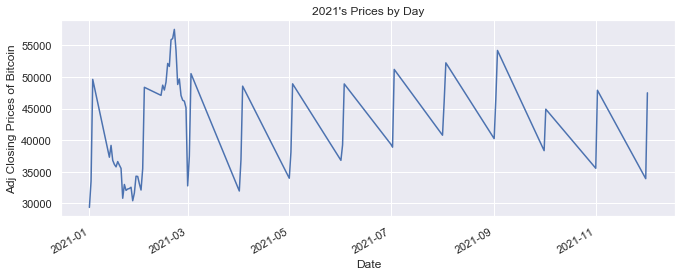

In [40]:
# What Patterns do you see below
ax = df.loc['2021','AdjCloseBTC'].plot()
ax.set_ylabel('Adj Closing Prices of Bitcoin')
ax.set_title("2021's Prices by Day")

In [41]:
#More analysis
df.loc['2020',['AdjCloseBTC','AdjCloseETH']]

,AdjCloseBTC,AdjCloseETH
Date,,
2020-01-01,7200.174316,130.802002
2020-02-01,6985.470215,127.410179
2020-03-01,7344.884277,134.171707
2020-04-01,7410.656738,135.069367
2020-05-01,7411.317383,136.276779
...,...,...
2020-12-27,26272.294920,682.642334
2020-12-28,27084.808590,730.397339
2020-12-29,27362.437500,731.520142


In [45]:
#Analyzing the Monthly Avg
df.loc['2020',['AdjCloseBTC','AdjCloseETH','AdjCloseRPL','AdjCloseLTC','Month']].groupby("Month").mean()

,AdjCloseBTC,AdjCloseETH,AdjCloseRPL,AdjCloseLTC
Month,,,,
1,9494.922552,218.133695,0.243309,57.086566
2,9931.265120,271.242824,0.269429,64.550317
3,7720.815461,191.823470,0.198736,43.769738
4,8667.635120,227.629622,0.220558,47.525710
5,9863.337087,241.370550,0.223056,47.926292
6,9932.949007,259.285100,0.218998,48.008115
7,10199.868558,283.023024,0.232058,50.109048
8,11340.862383,365.851015,0.277188,58.065664
9,10722.657547,334.442734,0.249502,49.534232


In [46]:
df.loc['2021',['AdjCloseBTC','AdjCloseETH','AdjCloseRPL','AdjCloseLTC','Month']].groupby("Month").mean()

,AdjCloseBTC,AdjCloseETH,AdjCloseRPL,AdjCloseLTC
Month,,,,
1,34681.628109,1270.580522,0.305443,140.444551
2,48412.505036,1649.480498,0.487058,196.017258
3,40264.118490,1404.090128,0.356539,168.109426
4,39153.049480,1392.303345,0.389910,160.344722
5,40354.680990,1450.644002,0.378305,164.737534
6,41667.585937,1513.233521,0.385032,169.237854
7,43160.391930,1521.019898,0.403609,170.505046
8,46413.532553,1601.847290,0.414843,177.475540
9,46980.979170,1628.018677,0.426028,186.417633


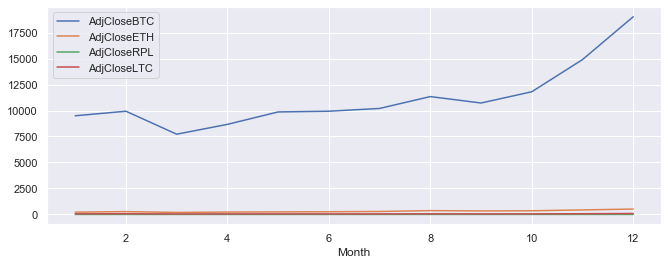

In [48]:
#Analyzing the Monthly Avg Now PLotting it
df.loc['2020',['AdjCloseBTC','AdjCloseETH','AdjCloseRPL','AdjCloseLTC','Month']].groupby("Month").mean().plot()

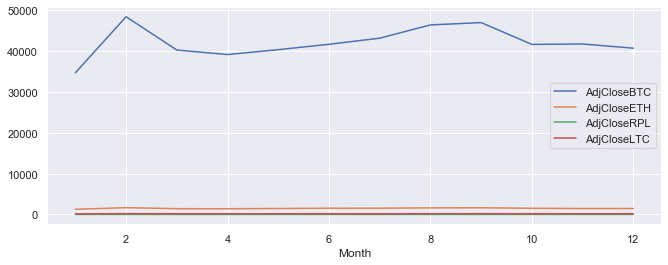

In [49]:
df.loc['2021',['AdjCloseBTC','AdjCloseETH','AdjCloseRPL','AdjCloseLTC','Month']].groupby("Month").mean().plot()

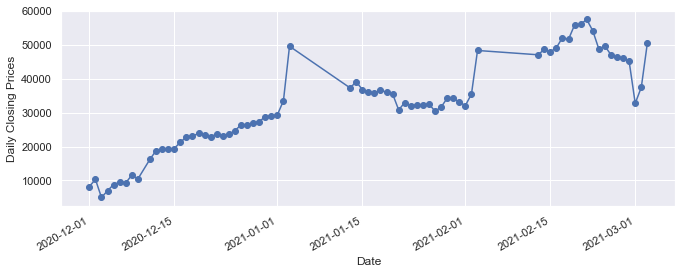

In [51]:
# Going Further - To observe the structural change
ax = df.loc['2020-12':'2021-03','AdjCloseBTC'].plot(marker='o',linestyle='-')
ax.set_ylabel('Daily Closing Prices');


In [52]:
import matplotlib.dates as mdates

In [57]:
# Samething But check the xtickers
#fig, ax = plt.subplots()
#df.plot(df.loc['2020-11':'2020-12','AdjCloseBTC'], marker='o', linestyle='-')
#ax.set_ylabel("Daily Adj Closing Prices BTC")
#ax.set_title("Dec-Jan Prices of BTC")

#SET x-axis major ticks to weekly interval on Mondays
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

#set x-ticks labels as 3-letter month name and day number
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));


In [60]:
#Grouping on the basis of weekdays Analysing the volume on the basis of weekdays
mean_by_weekday = df.loc["2020",['VolumeBTC','Weekday']].groupby('Weekday').mean()
mean_by_weekday

,VolumeBTC
Weekday,
0,3.198517e+10
1,3.066923e+10
2,3.292710e+10
3,3.652599e+10
4,3.179153e+10
5,2.948122e+10
6,3.037136e+10


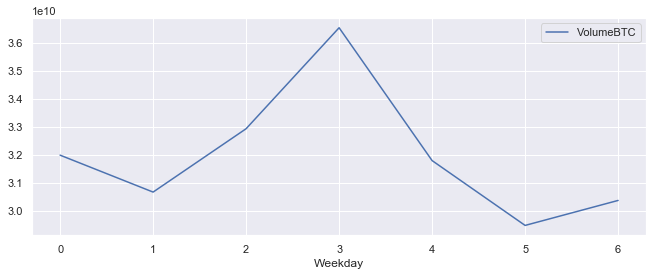

In [61]:
mean_by_weekday.plot();

In [62]:
day_of_week = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
new_index = mean_by_weekday.index.map(day_of_week)
mean_by_weekday.set_index(new_index)

,VolumeBTC
Weekday,
Monday,3.198517e+10
Tuesday,3.066923e+10
Wednesday,3.292710e+10
Thursday,3.652599e+10
Friday,3.179153e+10
Saturday,2.948122e+10
Sunday,3.037136e+10


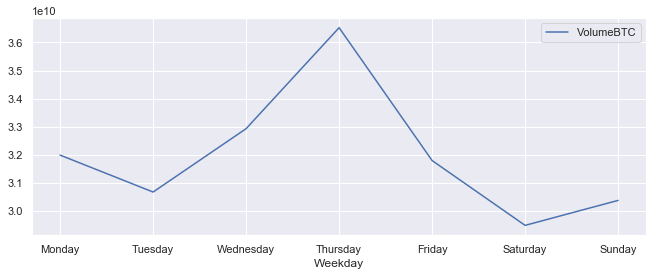

In [63]:
mean_by_weekday.set_index(new_index).plot();

## Summarising seasonality with Seaborn
below boxplot is for 2020-2021

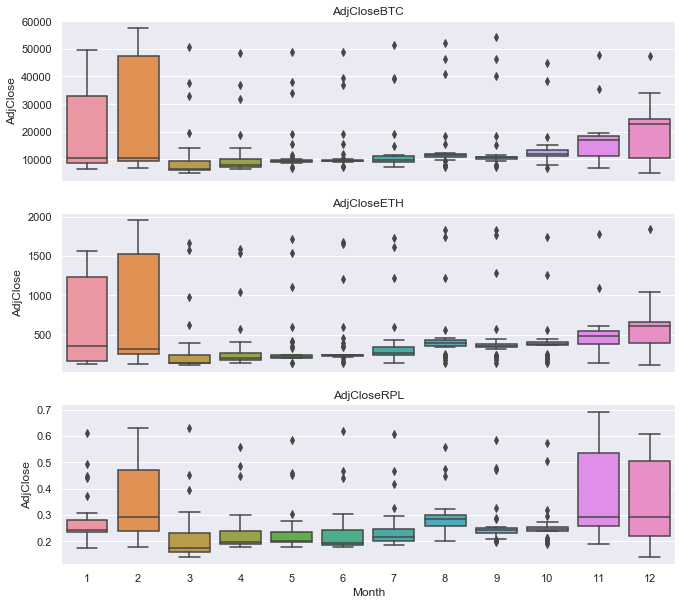

In [66]:
fig, axes = plt.subplots(3,1, figsize=(11,10), sharex=True)
for name, ax in zip(['AdjCloseBTC','AdjCloseETH','AdjCloseRPL'],axes):
    sns.boxplot(data=df,x='Month',y=name,ax=ax)
    ax.set_ylabel('AdjClose')
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

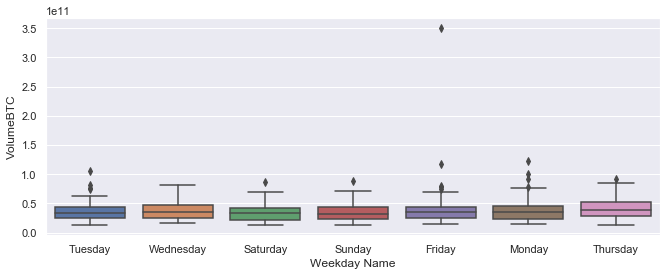

In [68]:
sns.boxplot(data=df,x = 'Weekday Name', y ='VolumeBTC'); 
#Based on the Weekdays

In [69]:
day_of_week

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [70]:
day_of_week.values()

dict_values(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

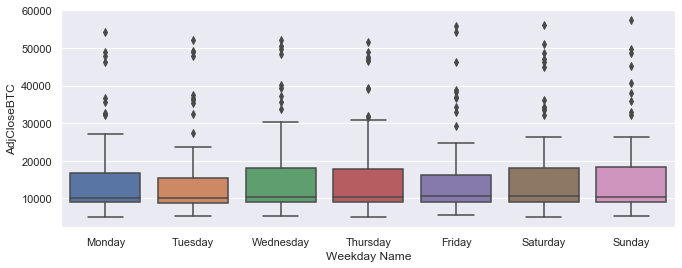

In [71]:
#What are the outliers telling us?
sns.boxplot(data=df,x = 'Weekday Name', y ='AdjCloseBTC',order=day_of_week.values()); 

In [77]:
#For a particular day
daily_mask = df['AdjCloseBTC'] == 'Monday'
df[daily_mask].query("AdjCloseBTC < 60000").sort_values('Month')

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,AdjCloseBTC,VolumeBTC,AdjCloseETH,VolumeETH,AdjCloseLTC,VolumeLTC,AdjCloseRPL,VolumeRPL,Year,Month,Weekday Name,Weekday,Is Weekend
Date,,,,,,,,,,,,,


### Autocorrelation and Lags
How similar is today's point to the same point N days in the future? Autocorrelations tests all frequencies
Lags look at 1 frequency (default is 1 unit ahead)

In [78]:
from pandas.plotting import autocorrelation_plot

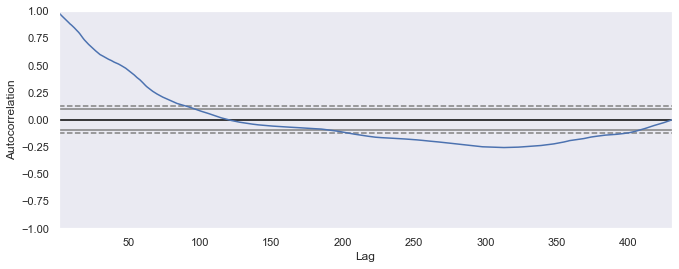

In [79]:
autocorrelation_plot(df.AdjCloseBTC)

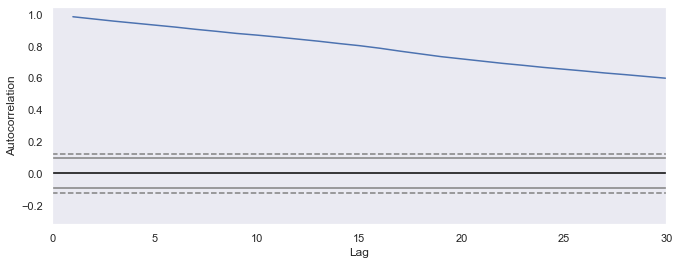

In [80]:
# For 1st 30 points
fig, ax = plt.subplots();
autocorrelation_plot(df.AdjCloseBTC,ax=ax)
ax.set_xlim(0,30);

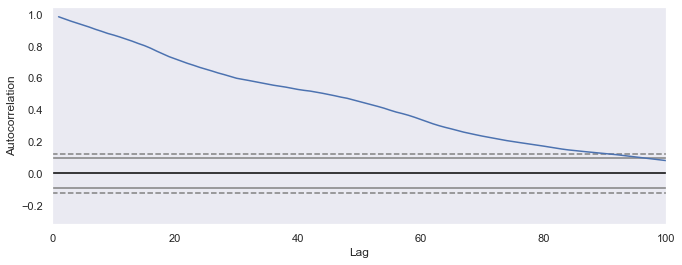

In [81]:
# For 1st 30 points
fig, ax = plt.subplots();
autocorrelation_plot(df.AdjCloseBTC,ax=ax)
ax.set_xlim(0,100);

# For sales data or website visit data - u shaped curve comes that is previous sunday & this Sunday pretty Similar

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


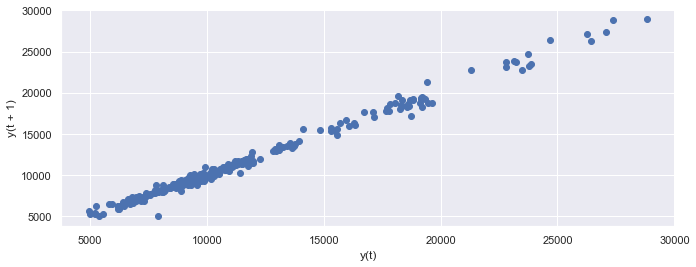

In [82]:
from pandas.plotting import lag_plot

data = df.loc['2020']
lag_plot(data['AdjCloseBTC']);  
#Lag_plot looking at my point today and my point tomorrow

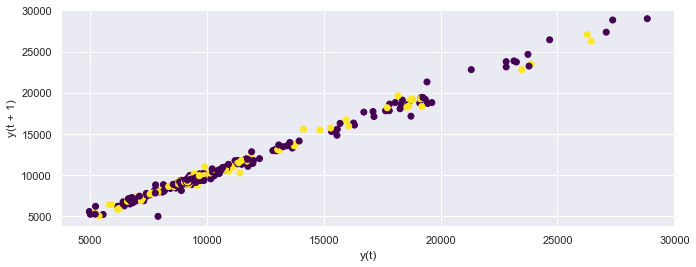

In [83]:
lag_plot(data['AdjCloseBTC'],c=data['Is Weekend'][:-1],cmap='viridis');
#Same above analysis but color weekend differnt

In [84]:
# Check the days to day-names list
df[['Weekday','Weekday Name']].drop_duplicates().sort_values('Weekday')

,Weekday,Weekday Name
Date,,
2020-06-01,0,Monday
2019-12-31,1,Tuesday
2020-01-01,2,Wednesday
2020-10-01,3,Thursday
2020-05-01,4,Friday
2020-02-01,5,Saturday
2020-03-01,6,Sunday


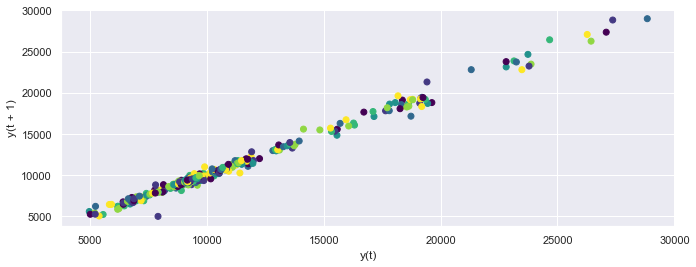

In [85]:
# Now above Visualisation by 7 diff. weekdays
lag_plot(data['AdjCloseBTC'],c=data['Weekday'][:-1],cmap='viridis');
# Color range from Purple to yellow i.e. Monday to Sunday

In [87]:
# Taking the mean of every week -# Weekly Resampling - Not Rolling sampling any ranom 7 day chunk and its mean
data_columns = ['AdjCloseBTC','AdjCloseETH','AdjCloseRPL','AdjCloseLTC']

df_mean = df[data_columns].resample('W').mean()
df_mean.head()


,AdjCloseBTC,AdjCloseETH,AdjCloseRPL,AdjCloseLTC
Date,,,,
2020-01-05,7970.107585,168.818509,0.208405,49.884502
2020-01-12,12327.014649,382.467205,0.294790,57.329576
2020-01-19,8725.835379,164.845588,0.232346,57.511367
2020-01-26,8557.291574,165.778944,0.229539,56.039774
2020-02-02,8967.770996,171.889987,0.232442,60.800877


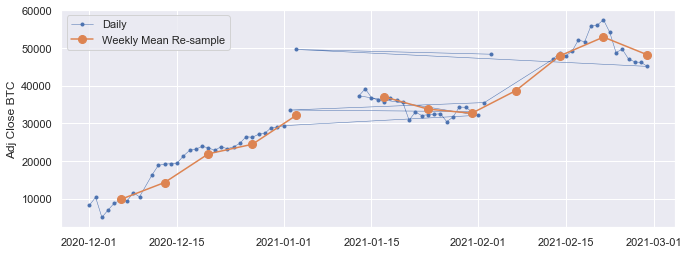

In [88]:
start, end = '2020-12','2021-2'
#Plot weekly and daily together
fig, ax = plt.subplots()
ax.plot(df.loc[start:end,'AdjCloseBTC'],
marker='.',linestyle='-',linewidth=0.5,label='Daily')
ax.plot(df_mean.loc[start:end,'AdjCloseBTC'],
marker='o',markersize=8,linestyle='-',label='Weekly Mean Re-sample')
ax.set_ylabel('Adj Close BTC')
ax.legend();


## Rolling Means

In [89]:
# Compute the centered 7-day rolling mean (not centered, using history only)
df_7d = df[data_columns].rolling(7,center=False).mean()
df_7d.head(10)


,AdjCloseBTC,AdjCloseETH,AdjCloseRPL,AdjCloseLTC
Date,,,,
2019-12-31,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,NaN
2020-04-01,NaN,NaN,NaN,NaN
2020-05-01,NaN,NaN,NaN,NaN
2020-06-01,7330.760184,133.949292,0.196932,42.613221
2020-07-01,7469.344936,135.939740,0.199936,43.339579
2020-08-01,7595.014718,137.433473,0.202273,43.859015


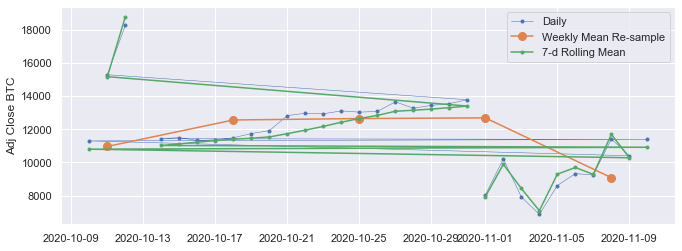

In [93]:
start, end = '2020-10-10','2020-11-10'
#Plot weekly resampled and daily together and 7-day rolling mean 
fig, ax = plt.subplots()
ax.plot(df.loc[start:end,'AdjCloseBTC'],
marker='.',linestyle='-',linewidth=0.5,label='Daily')
ax.plot(df_mean.loc[start:end,'AdjCloseBTC'],
marker='o',markersize=8,linestyle='-',label='Weekly Mean Re-sample')
ax.plot(df_7d.loc[start:end,'AdjCloseBTC'],
marker='.',linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Adj Close BTC')
ax.legend();

### Trends

In [94]:
df_365d = df[data_columns].rolling(365,center=False).mean()
df_365d.head(3)

,AdjCloseBTC,AdjCloseETH,AdjCloseRPL,AdjCloseLTC
Date,,,,
2019-12-31,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Trends in BTC Prices')

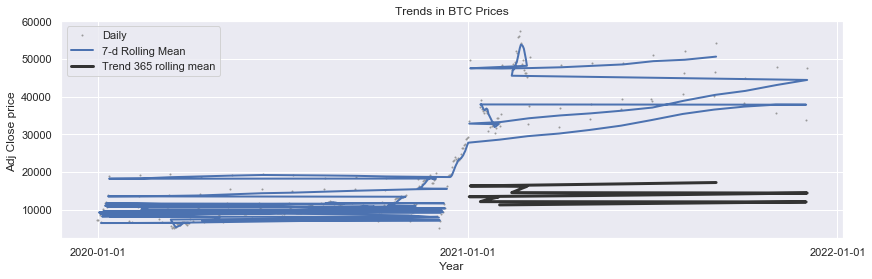

In [98]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(df['AdjCloseBTC'],marker='.',markersize=2,color='0.6',linestyle='None',label='Daily')
ax.plot(df_7d['AdjCloseBTC'],linewidth=2,label='7-d Rolling Mean')
ax.plot(df_365d['AdjCloseBTC'],color='0.2' ,linewidth=3,label='Trend 365 rolling mean')

#Set x tickers
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Adj Close price ')
ax.set_title('Trends in BTC Prices')

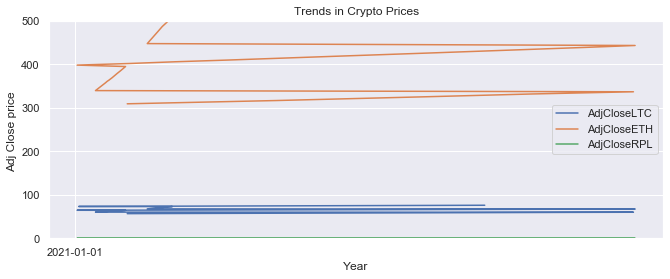

In [99]:
# Lets do the same for BTC- ETH - RPL - LTC and plot their 365 rolling mean
fig, ax = plt.subplots()
for nm in ['AdjCloseLTC','AdjCloseETH','AdjCloseRPL']:
    ax.plot(df_365d[nm], label=nm)
    #set x tickers
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0,500)
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Adj Close price ')
    ax.set_title('Trends in Crypto Prices')


# Share of ETH and RPL  on BTC ( Data not enough)

In [104]:
#Computing the monthly sum 
df_annual = df[data_columns].resample('A').sum(min_count=30)
df_annual = df_annual.set_index(df_annual.index.month)
df_annual.index.name = 'Month'
df_annual.head()

,AdjCloseBTC,AdjCloseETH,AdjCloseRPL,AdjCloseLTC
Month,,,,
12,NaN,NaN,NaN,NaN
12,4.027539e+06,111256.657326,93.622216,20393.481630
12,2.824995e+06,99593.772159,26.772836,11411.496345
